In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_ollama import ChatOllama

In [8]:
import base64
from io import BytesIO
import requests

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


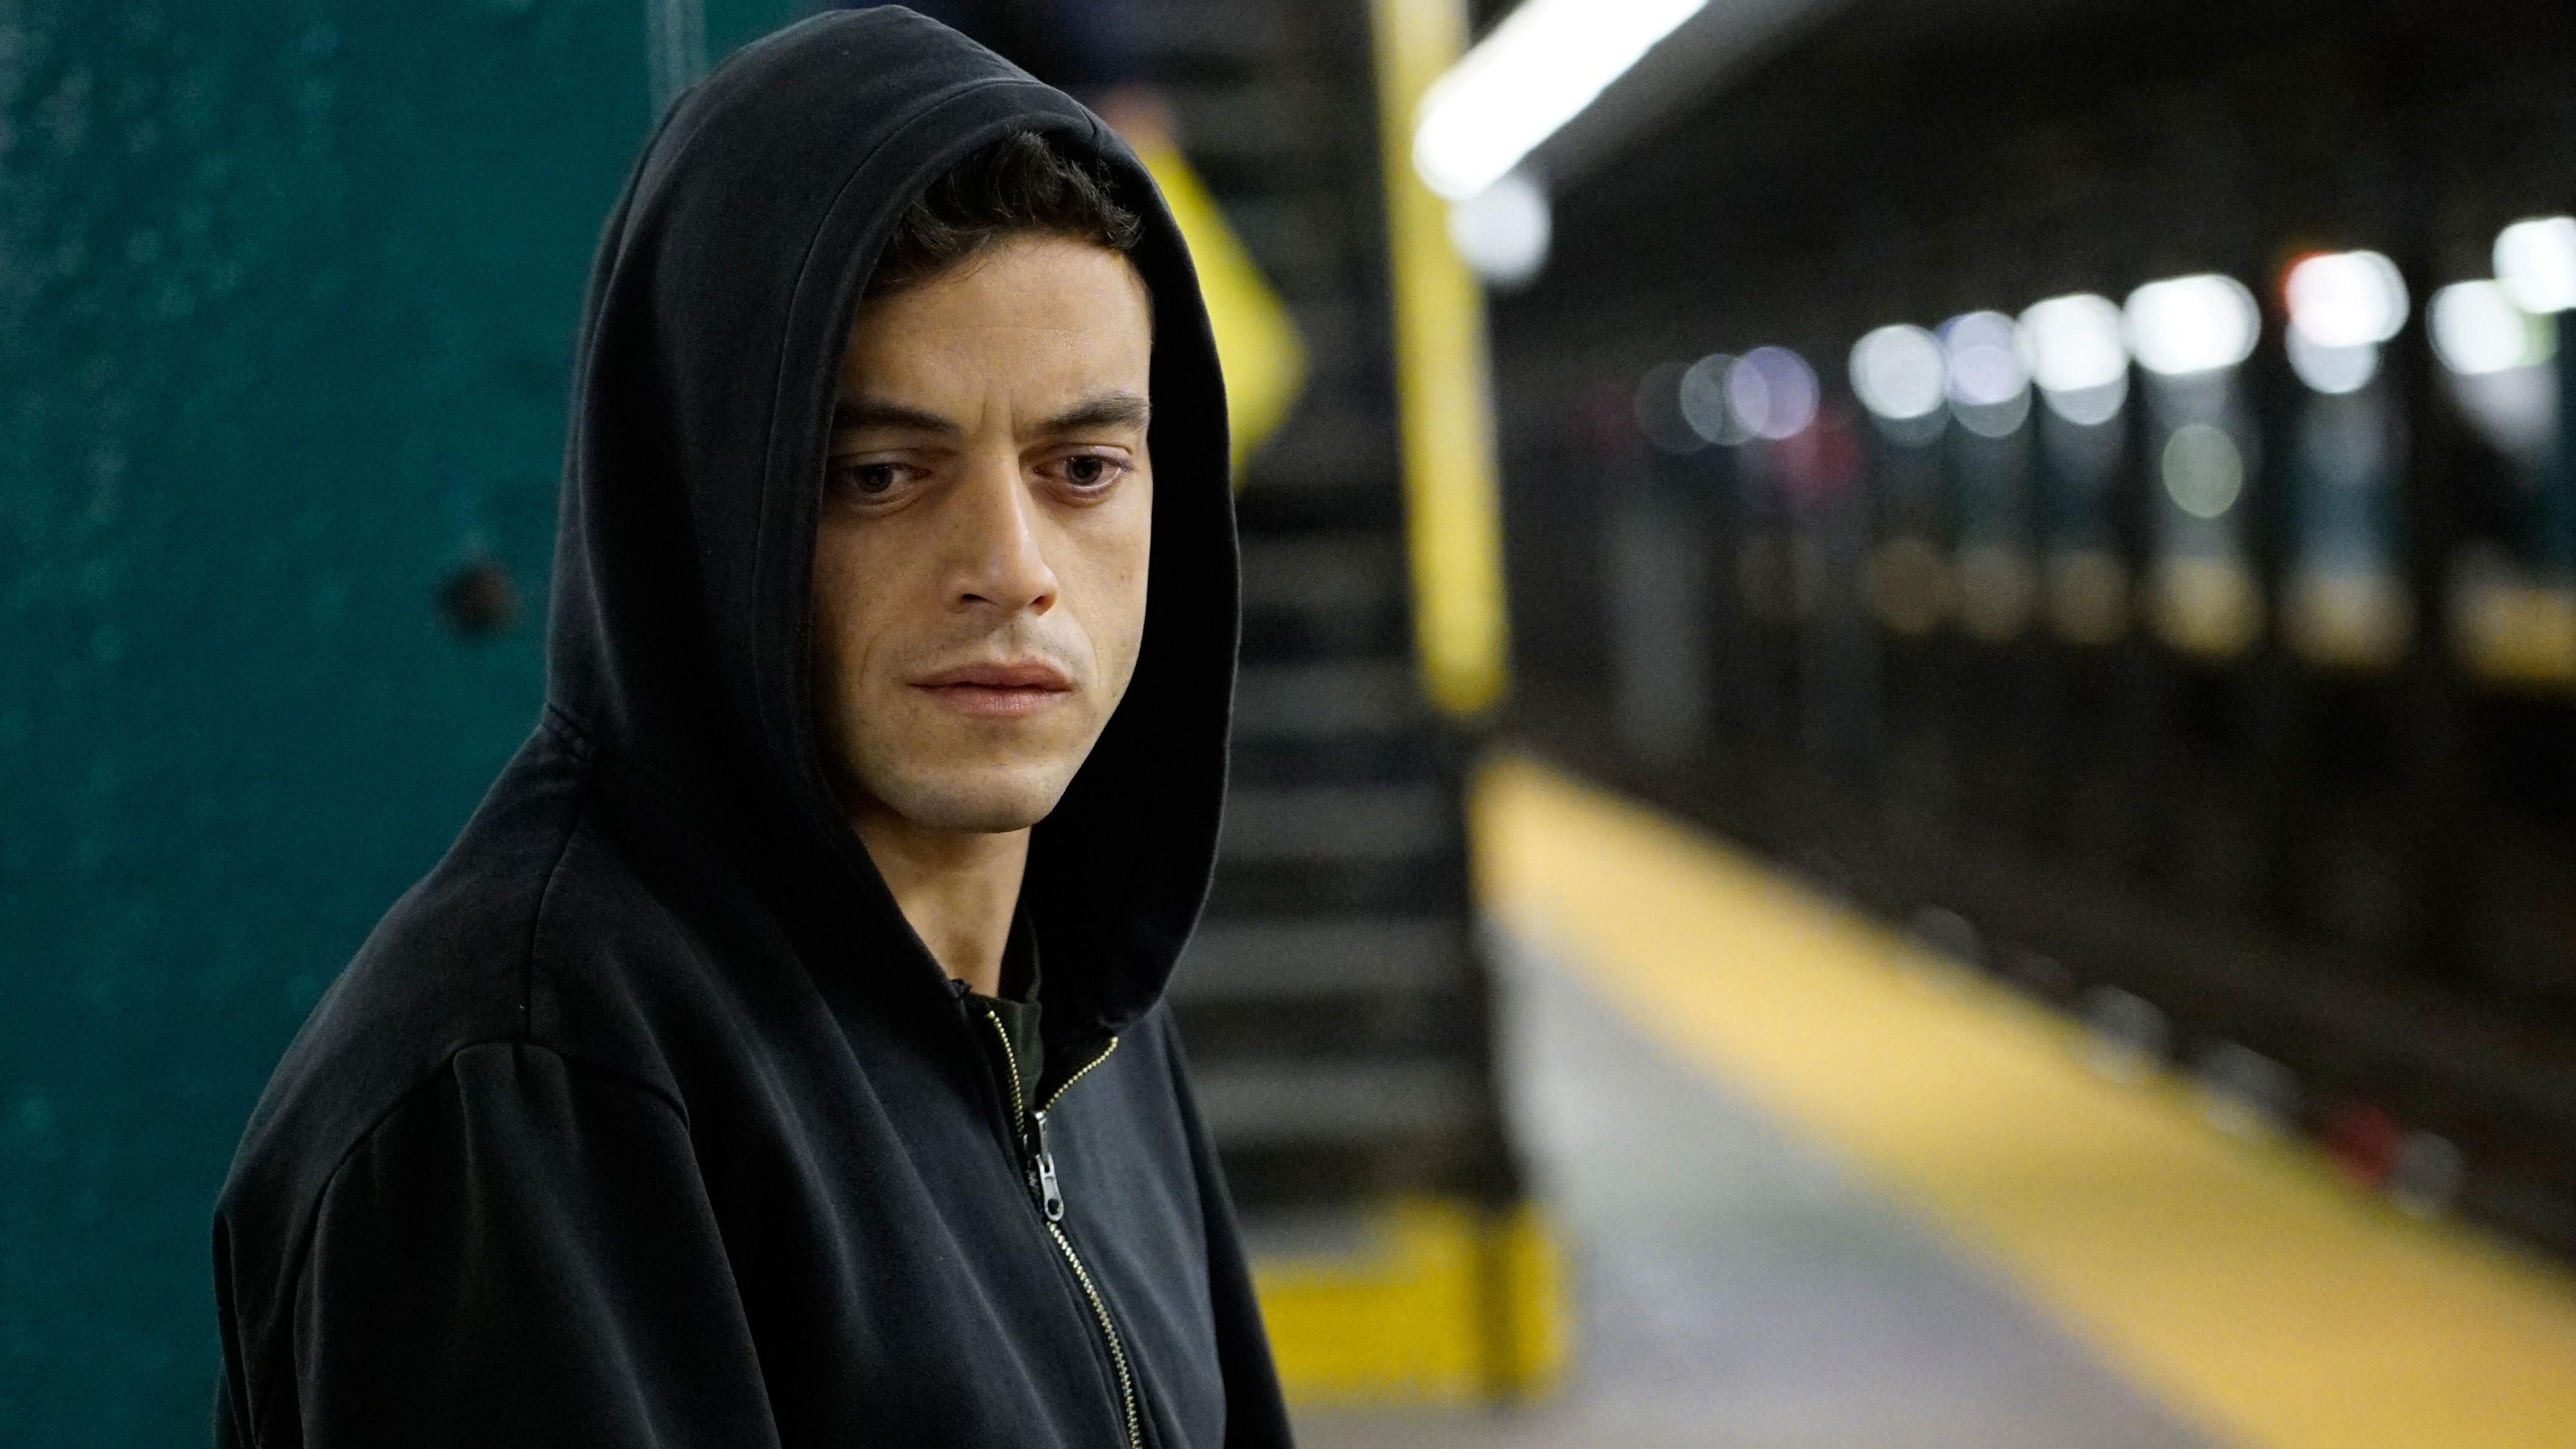

In [10]:
url = "https://arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/GQDGPND74BBO7FV4K5BCI6FB5E.jpg"
response = requests.get(url)
pil_image = Image.open(BytesIO(response.content))

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [26]:
llm = ChatOllama(model="llava:34b", temperature=0)

def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [
        SystemMessage(content="You are a cinematic vision analysis expert. Analyze the provided image and determine the type of cinematographic shot depicted. Classify the shot into one of the standard categories such as Close-Up, Medium Shot, Long Shot, Extreme Close-Up, Over-the-Shoulder Shot, etc. Describe the characteristics that define this shot type and explain how it is typically used in filmmaking. Additionally, provide a confidence score (from 0 to 1) indicating how certain you are about the classification."),
        HumanMessage(content=content_parts)
    ]


chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "what type of cinematographic shot is the image?", "image": image_b64}
)

print(query_chain)

The image appears to be a Close-Up shot, focusing on the upper body and head of the person. This shot type typically captures the subject from the chest up, allowing for greater detail in facial expressions and emotions. It's often used in filmmaking to convey intimacy or to emphasize the importance of the character at that moment. The confidence score for this classification would be high, as it is a clear example of a Close-Up shot.
